# Implementing Logistic Regression 

In [11]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_8924\171121386.py:1: SyntaxWarning: invalid escape sequence '\D'
  rain_df = pd.read_csv('D:\Data Analysis With Python\Machine Learning - Scikit learn\My Notes\data\weatherAUS.csv')


In [3]:
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analying the unique values

In [7]:
for i in rain_df.drop(columns=['Date']).columns :
    print(f"Unique Values in {i} is :{rain_df[i].unique()}")

Unique Values in Location is :['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Unique Values in MinTemp is :[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6

In [23]:
null_count=[]
for i in rain_df.columns:
    null_count.append(rain_df[i].isnull().sum())
    print(f"Null Values in {i} are : {rain_df[i].isnull().sum()}")
null_list=pd.Series(null_count,index=[x for x in rain_df.columns])

Null Values in Date are : 0
Null Values in Location are : 0
Null Values in MinTemp are : 1485
Null Values in MaxTemp are : 1261
Null Values in Rainfall are : 3261
Null Values in Evaporation are : 62790
Null Values in Sunshine are : 69835
Null Values in WindGustDir are : 10326
Null Values in WindGustSpeed are : 10263
Null Values in WindDir9am are : 10566
Null Values in WindDir3pm are : 4228
Null Values in WindSpeed9am are : 1767
Null Values in WindSpeed3pm are : 3062
Null Values in Humidity9am are : 2654
Null Values in Humidity3pm are : 4507
Null Values in Pressure9am are : 15065
Null Values in Pressure3pm are : 15028
Null Values in Cloud9am are : 55888
Null Values in Cloud3pm are : 59358
Null Values in Temp9am are : 1767
Null Values in Temp3pm are : 3609
Null Values in RainToday are : 3261
Null Values in RainTomorrow are : 3267


Comparing the Null Values Counts

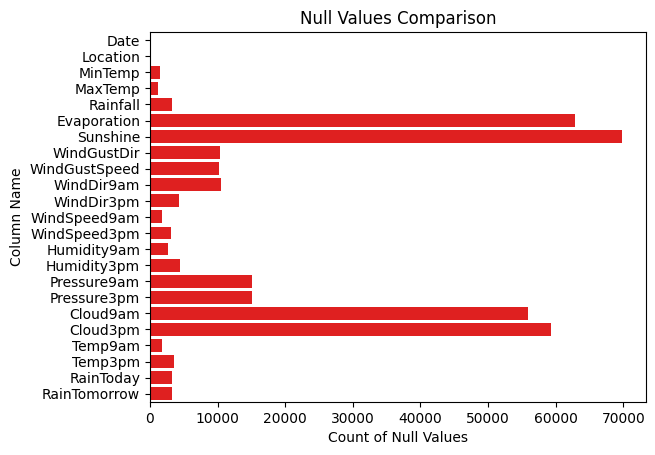

In [22]:
plt.title("Null Values Comparison")
plt.xlabel("Count of Null Values")
plt.ylabel("Column Name")
sns.barplot(x=null_list,y=null_list.index,color='red');

Handling NuLL Values

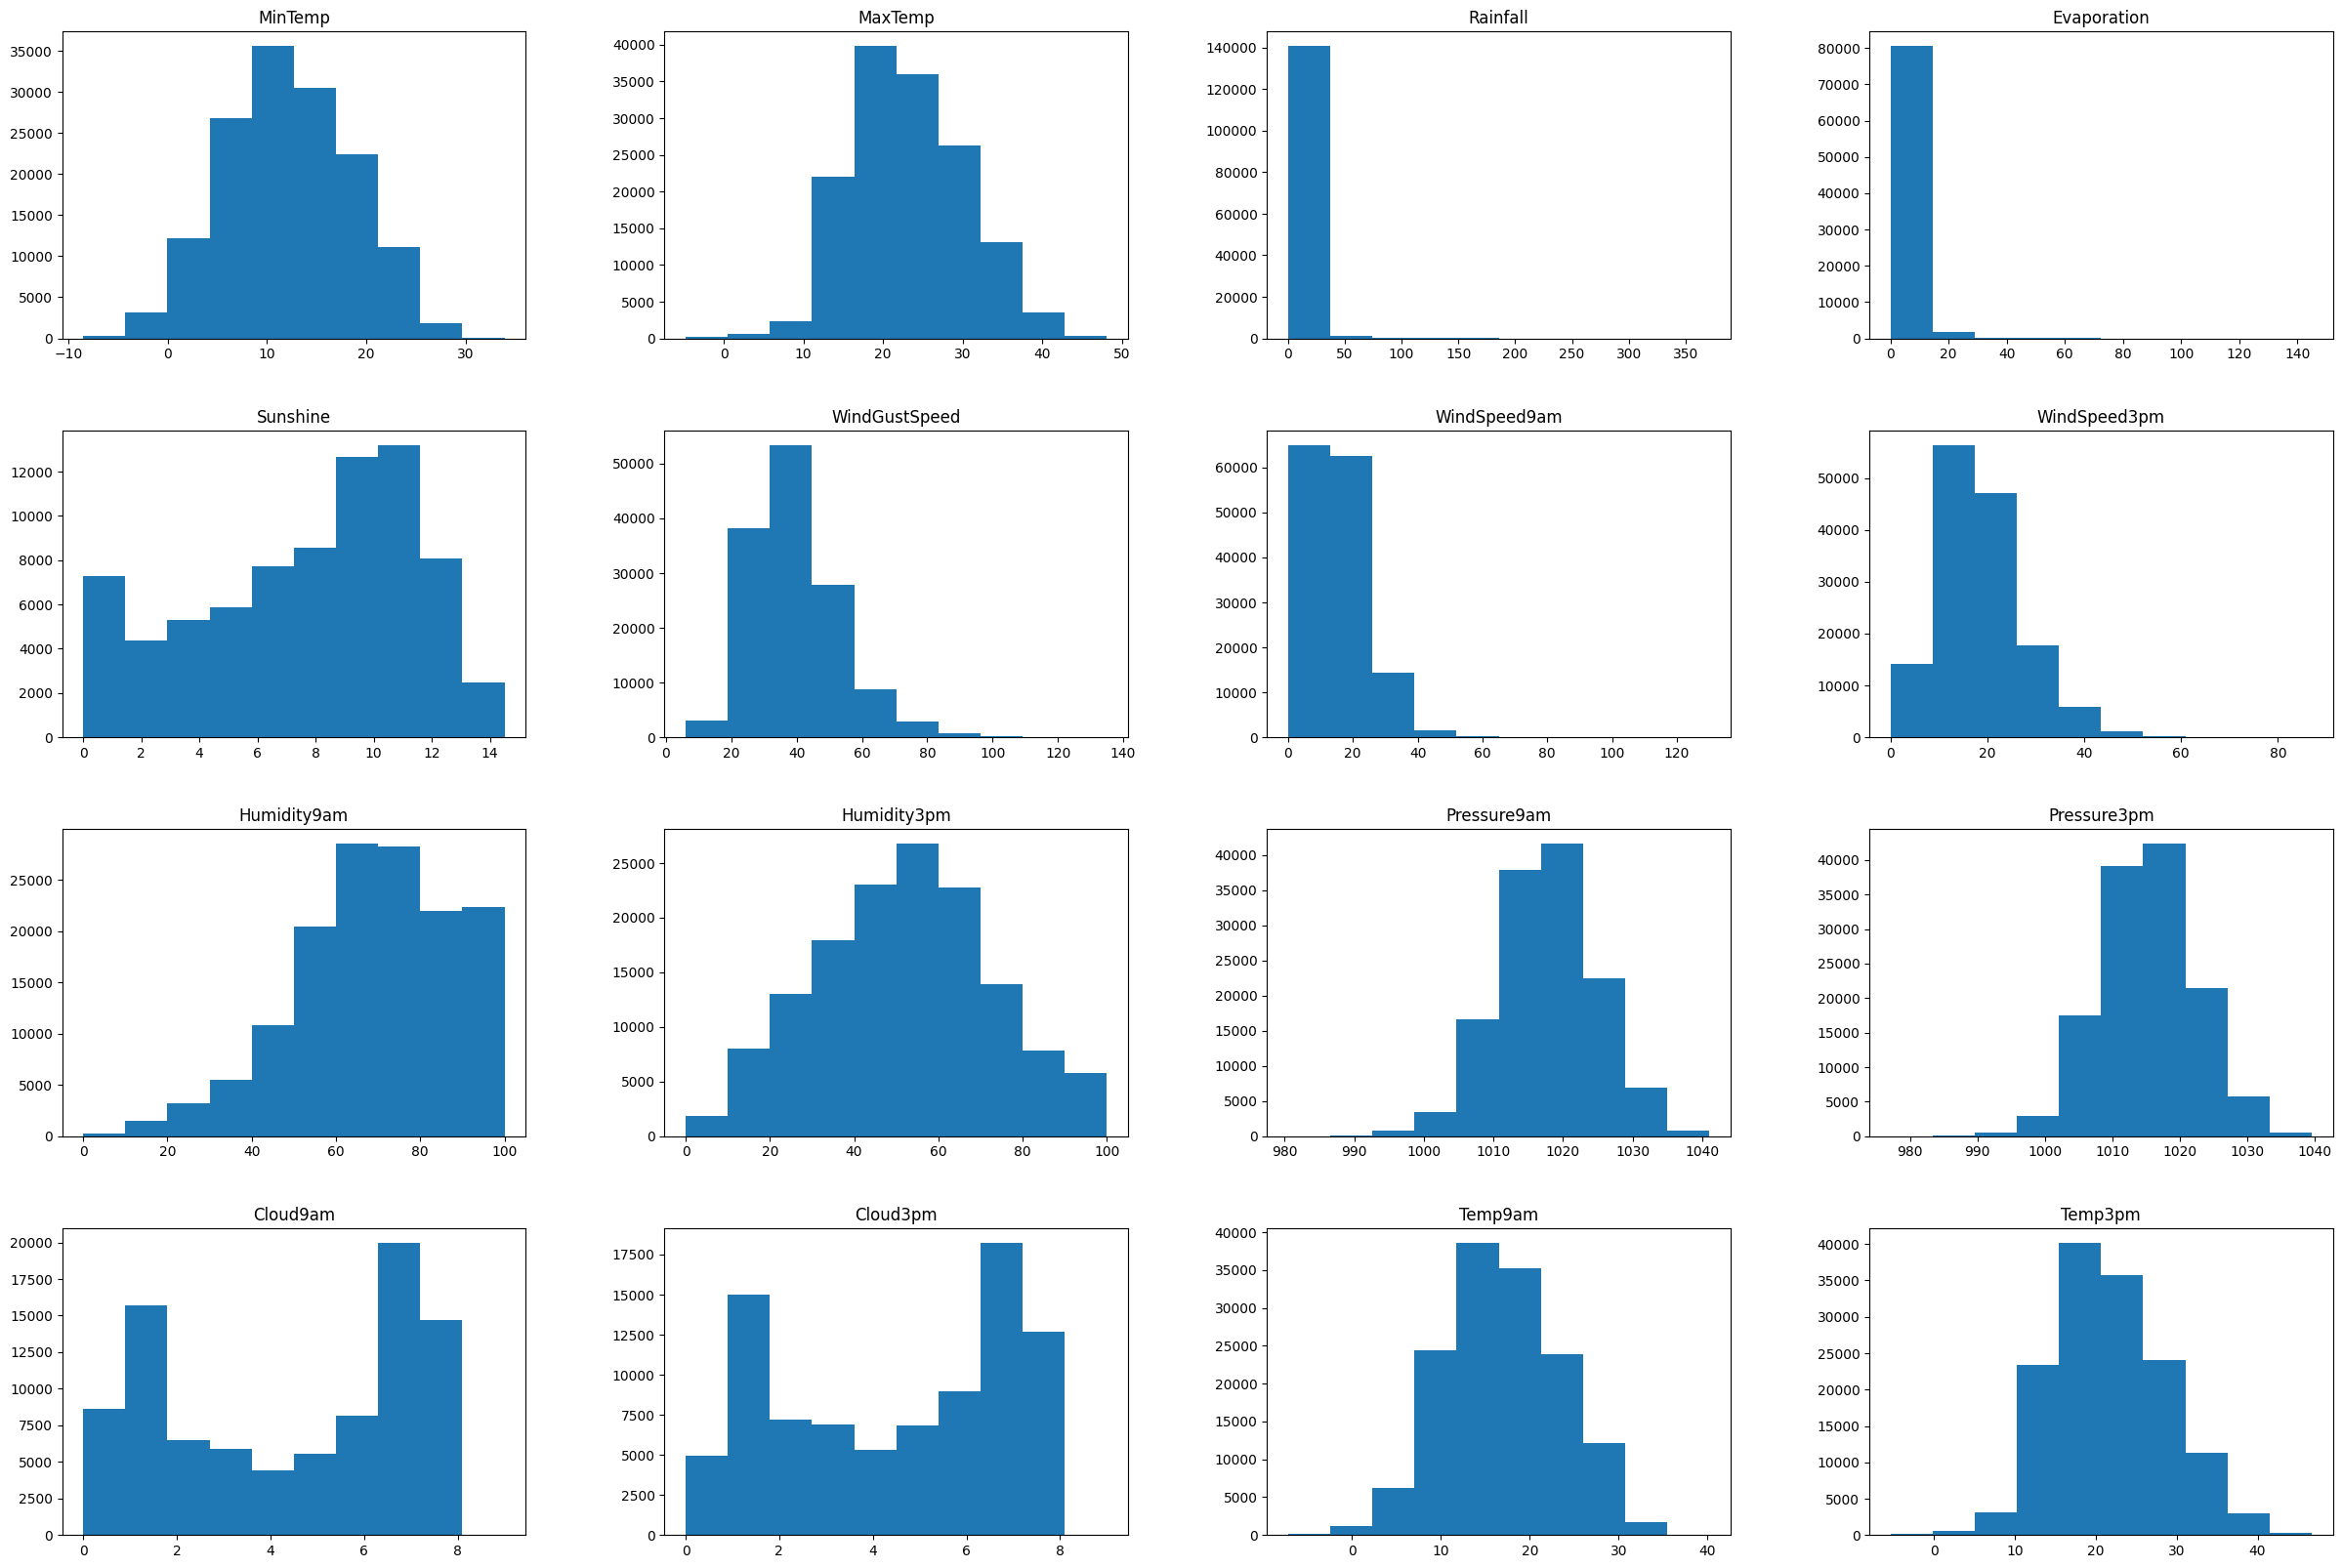

In [42]:
# plt.title("Distribution of Features in the Data")
rain_df.hist(grid=False,figsize=(30,20));